# <p style="font-family:newtimeroman;color:#182F2F;font-size:200%;text-align:center;border-radius:10px 10px;">Customer Personality Analysis- Clustering</p>

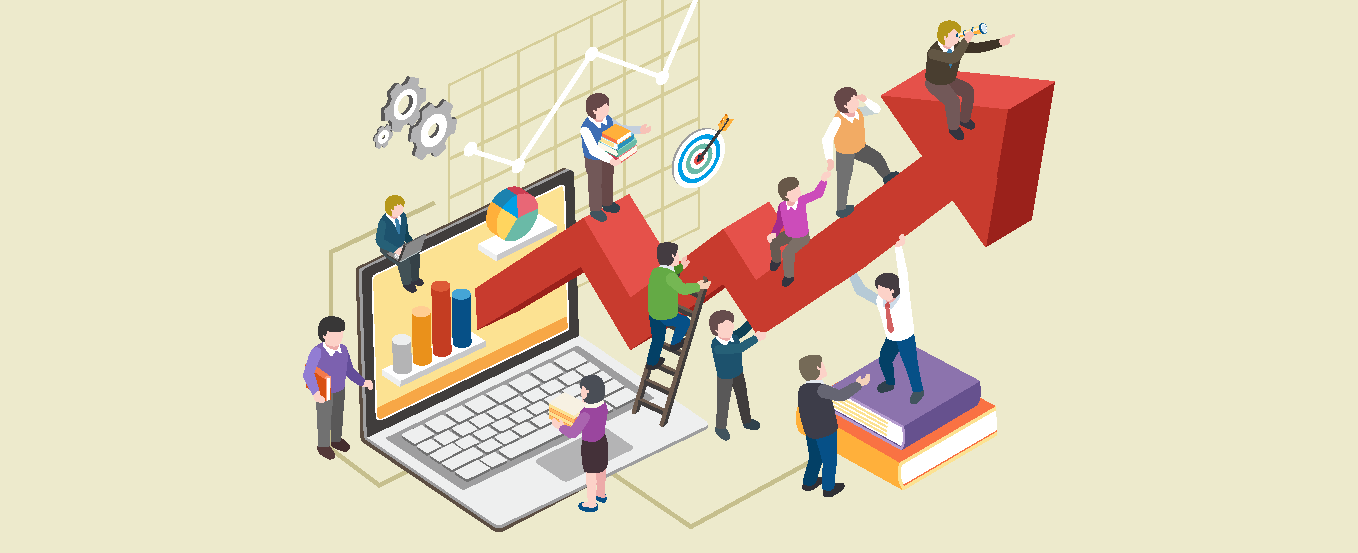

# <p style="font-family:newtimeroman;color:#182F2F;font-size:100%;text-align:left;border-radius:10px 10px;">PROBLEM STATEMENT:</p>
A well known company with numerous products needs to analyze their customer behavior and
classify them whether they will accept the campaigns held by the company. Also, cluster the
customers into different segments.

# <p style="font-family:newtimeroman;color:#182F2F;font-size:100%;text-align:left;border-radius:10px 10px;">GOALS:
The objective of this project is to build a model, using historical data Focus on all steps of data
science (EDA, data processing, model, evaluation, charts)
1. Highlight any trend in data, deep insight, novel steps that you take
2. Highlight next steps and improvements.
3. Apply classification and clustering machine learning algorithms and evaluate it using Test dataset.

# <p style="font-family:newtimeroman;color:#182F2F;font-size:100%;text-align:left;border-radius:10px 10px;">ABOUT THE DATASET:
**PEOPLE**

1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise
    
**PRODUCTS**

1. MntWines: Amount spent on wine in last 2 years
2. MntFruits: Amount spent on fruits in last 2 years
3. MntMeatProducts: Amount spent on meat in last 2 years
4. MntFishProducts: Amount spent on fish in last 2 years
5. MntSweetProducts: Amount spent on sweets in last 2 years
6. MntGoldProds: Amount spent on gold in last 2 years

**PROMOTION**

1. NumDealsPurchases: Number of purchases made with a discount
2. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
3. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
4. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
5. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
6. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
7. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
    
**PLACE**

1. NumWebPurchases: Number of purchases made through the company’s website
2. NumCatalogPurchases: Number of purchases made using a catalogue
3. NumStorePurchases: Number of purchases made directly in stores
4. NumWebVisitsMonth: Number of visits to company’s website in the last month

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>

**1. IMPORT LIBRARIES**

**2. LOAD DATASET**

**3. DATA EXPLORATION**

    3.1 SUMMARIZE DATASET
    3.2 FEATURE ENGINEERING
    
**4. EXPLORATORY DATA ANALYSIS (EDA)**
 
    4.1 UNIVARIATE ANALYSIS 
    4.2 BIVARIATE ANALYSIS 
    4.3 MULTIIVARIATE ANALYSIS 
    
**5. DATA PREPROCESSING**
 
    5.1 ENCODING  
    5.2 SCALING  

**6. DIMENSIONALITY REDUCTION**
 
    6.1 PRINCIPAL COMPONENT ANALYSIS (PCA)
    
**7. CLUSTERING**
 
    7.1 AGGLOMERATIVE CLUSTERING
    7.2 KMEANS CLUSTERING
    
**8. MODEL EVALUATION**
 
    8.1 WITH GIVEN TESTING DATASET

**9. CLUSTER ANALYSIS**

**10. PROFILING**

**11. CONCLUSION**

**12. END**

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">IMPORT LIBRARIES</p>

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
import seaborn as sns

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">LOAD DATASET</p>

In [2]:
#load dataset(training and testing datasets separately)
df_training=pd.read_csv('market_train.csv')
df_testing=pd.read_csv('market_test.csv')

In [3]:
df_training

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,1675,1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,18,8000,8000,22000,24000,11000,9000,1,1,1,4,4,0,0,0,0,0,0,3,11,0
1676,1676,1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,45,50000,15000,110000,39000,15000,15000,4,5,1,4,8,0,0,0,0,0,0,3,11,0
1677,1677,1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,26,1000,1000,4000,11000,9000,10000,1,1,0,3,8,0,0,0,0,0,0,3,11,0
1678,1678,1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,0,308000,0,73000,0,0,23000,2,5,1,8,7,0,0,0,0,0,0,3,11,0


In [4]:
df_testing

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1681,1681,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,43000,5000,28000,7000,6000,33000,4,3,1,3,5,0,0,0,0,0,0,3,11,0
1,1682,1682,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,38,27000,0,10000,0,0,4000,4,2,0,4,5,0,0,0,0,0,0,3,11,0
2,1683,1683,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,53,6000,0,3000,0,0,1000,1,0,0,3,3,0,0,0,0,0,0,3,11,0
3,1684,1684,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,88,205000,7000,41000,3000,2000,46000,2,4,2,5,5,0,0,0,0,0,0,3,11,0
4,1685,1685,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,99,24000,0,8000,0,1000,4000,1,1,0,3,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
555,2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
556,2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
557,2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [5]:
#remove the unwanted columns

df_train=df_training.iloc[:,2:]
df_train

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,4712,1991,D3,Bertunangan,20193000.0,0,0,28-11-2012,18,8000,8000,22000,24000,11000,9000,1,1,1,4,4,0,0,0,0,0,0,3,11,0
1676,1170,1975,S1,Menikah,27573000.0,1,0,25-03-2013,45,50000,15000,110000,39000,15000,15000,4,5,1,4,8,0,0,0,0,0,0,3,11,0
1677,6347,1979,SMA,Lajang,15862000.0,1,0,27-06-2013,26,1000,1000,4000,11000,9000,10000,1,1,0,3,8,0,0,0,0,0,0,3,11,0
1678,4065,1976,S3,Menikah,49544000.0,1,0,12-02-2013,0,308000,0,73000,0,0,23000,2,5,1,8,7,0,0,0,0,0,0,3,11,0


In [6]:
#remove the unanted columns

df_test=df_testing.iloc[:,2:]
df_test

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5939,1971,S1,Bertunangan,38232000.0,1,1,17-01-2014,84,43000,5000,28000,7000,6000,33000,4,3,1,3,5,0,0,0,0,0,0,3,11,0
1,2156,1955,S3,Menikah,22554000.0,1,1,03-11-2012,38,27000,0,10000,0,0,4000,4,2,0,4,5,0,0,0,0,0,0,3,11,0
2,7788,1983,S3,Menikah,23536000.0,1,0,04-06-2014,53,6000,0,3000,0,0,1000,1,0,0,3,3,0,0,0,0,0,0,3,11,0
3,10323,1952,S1,Menikah,49413000.0,0,1,25-10-2013,88,205000,7000,41000,3000,2000,46000,2,4,2,5,5,0,0,0,0,0,0,3,11,0
4,7947,1969,S1,Menikah,42231000.0,1,1,25-03-2014,99,24000,0,8000,0,1000,4000,1,1,0,3,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0
555,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0
556,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0
557,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">DATA EXPLORATION</p>

In [7]:
#summarize datasets

df_train.shape

(1680, 29)

In [8]:
df_test.shape

(559, 29)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1680 non-null   int64  
 1   Year_Birth           1680 non-null   int64  
 2   Education            1680 non-null   object 
 3   Marital_Status       1680 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1680 non-null   int64  
 6   Teenhome             1680 non-null   int64  
 7   Dt_Customer          1680 non-null   object 
 8   Recency              1680 non-null   int64  
 9   MntCoke              1680 non-null   int64  
 10  MntFruits            1680 non-null   int64  
 11  MntMeatProducts      1680 non-null   int64  
 12  MntFishProducts      1680 non-null   int64  
 13  MntSweetProducts     1680 non-null   int64  
 14  MntGoldProds         1680 non-null   int64  
 15  NumDealsPurchases    1680 non-null   i

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   559 non-null    int64  
 1   Year_Birth           559 non-null    int64  
 2   Education            559 non-null    object 
 3   Marital_Status       559 non-null    object 
 4   Income               552 non-null    float64
 5   Kidhome              559 non-null    int64  
 6   Teenhome             559 non-null    int64  
 7   Dt_Customer          559 non-null    object 
 8   Recency              559 non-null    int64  
 9   MntCoke              559 non-null    int64  
 10  MntFruits            559 non-null    int64  
 11  MntMeatProducts      559 non-null    int64  
 12  MntFishProducts      559 non-null    int64  
 13  MntSweetProducts     559 non-null    int64  
 14  MntGoldProds         559 non-null    int64  
 15  NumDealsPurchases    559 non-null    int

In [11]:
# check for duplicated rows

df_train.duplicated().sum()

0

In [12]:
df_test.duplicated().sum()

0

In [13]:
# check for null/missing values

df_train.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [14]:
df_test.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 7
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### Observations:
1. Null values are less so drop it.

In [15]:
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [16]:
df_train.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [17]:
df_test.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [18]:
# statistical analysis

df_train.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.0,1663.0,1663.000000
mean,5547.541191,1968.849068,5.201434e+07,0.449188,0.499098,49.061335,3.060469e+05,25978.352375,1.664546e+05,37110.042093,26979.555021,43331.328924,2.338545,4.038485,2.682502,5.797956,5.331930,0.072159,0.073963,0.069753,0.061936,0.012026,0.010222,3.0,11.0,0.145520
std,3240.106517,12.037325,2.148248e+07,0.544890,0.549449,28.914182,3.392420e+05,39576.041604,2.248949e+05,54348.868950,41273.567857,50904.197540,1.956260,2.616657,2.980317,3.245112,2.451058,0.258828,0.261789,0.254808,0.241112,0.109037,0.100618,0.0,0.0,0.352731
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.500000,1960.000000,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5376.000000,1970.000000,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8369.500000,1977.000000,6.812200e+07,1.000000,1.000000,74.000000,4.990000e+05,32000.000000,2.345000e+05,48000.000000,32000.000000,55000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,198000.000000,262000.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [19]:
# unique values in each columns

df_train.nunique()

ID                     1663
Year_Birth               58
Education                 5
Marital_Status            6
Income                 1512
Kidhome                   3
Teenhome                  3
Dt_Customer             619
Recency                 100
MntCoke                 679
MntFruits               151
MntMeatProducts         482
MntFishProducts         171
MntSweetProducts        166
MntGoldProds            194
NumDealsPurchases        15
NumWebPurchases          12
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        15
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

### Observation:
1. The 'Z_CostContact' and 'Z_Revenue' columns contains only 1 item and they are not going to contribute anything in the model building. So we can drop them.

In [20]:
# drop the unwanted columns

df_train.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)
df_test.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

In [21]:
print('df_train size: ',df_train.shape)
print('df_test size: ',df_test.shape)

df_train size:  (1663, 27)
df_test size:  (552, 27)


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1663 entries, 0 to 1679
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1663 non-null   int64  
 1   Year_Birth           1663 non-null   int64  
 2   Education            1663 non-null   object 
 3   Marital_Status       1663 non-null   object 
 4   Income               1663 non-null   float64
 5   Kidhome              1663 non-null   int64  
 6   Teenhome             1663 non-null   int64  
 7   Dt_Customer          1663 non-null   object 
 8   Recency              1663 non-null   int64  
 9   MntCoke              1663 non-null   int64  
 10  MntFruits            1663 non-null   int64  
 11  MntMeatProducts      1663 non-null   int64  
 12  MntFishProducts      1663 non-null   int64  
 13  MntSweetProducts     1663 non-null   int64  
 14  MntGoldProds         1663 non-null   int64  
 15  NumDealsPurchases    1663 non-null   i

In [23]:
# Unique values in categorical features

df_train['Education'].value_counts()

S1     825
S3     369
S2     277
D3     157
SMA     35
Name: Education, dtype: int64

In [24]:
df_train['Marital_Status'].value_counts()

Menikah        644
Bertunangan    434
Lajang         353
Cerai          177
Janda           52
Duda             3
Name: Marital_Status, dtype: int64

In [25]:
# to get more understanding translate this indonesian words to english

df_train["Marital_Status"]=df_train["Marital_Status"].replace({"Menikah":"Married", "Bertunangan":"Engaged", "Lajang":"Single", "Cerai":"Divorced", "Janda":"Widow", "Duda":"Widow"})
df_train["Education"]=df_train["Education"].replace({"S1":"BSc", "S2":"MSc", "S3":"PhD", "D3":"Diploma", "SMA":"Diploma"})

df_test["Marital_Status"]=df_test["Marital_Status"].replace({"Menikah":"Married", "Bertunangan":"Engaged", "Lajang":"Single", "Cerai":"Divorced", "Janda":"Widow", "Duda":"Widow"})
df_test["Education"]=df_test["Education"].replace({"S1":"BSc", "S2":"MSc", "S3":"PhD", "D3":"Diploma", "SMA":"Diploma"})

In [26]:
df_train['Education'].value_counts()

BSc        825
PhD        369
MSc        277
Diploma    192
Name: Education, dtype: int64

In [27]:
df_train['Marital_Status'].value_counts()

Married     644
Engaged     434
Single      353
Divorced    177
Widow        55
Name: Marital_Status, dtype: int64

### Feature Engineering

In [28]:
df_train.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### performing the following steps to engineer some new features:

1. Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
2. Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of purchasing.
3. Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
4. Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
5. To get further clarity of household, Creating feature indicating **"Family_Size"**
6. Create a feature **"Is_Parent"** to indicate parenthood status
7. Create three categories in the **"Education"** by simplifying its value counts.
8. Dropping some of the redundant features

In [29]:
import datetime
#Age of customer today 
df_train["Age"] = 2023-df_train["Year_Birth"]

#Total spendings on various items
df_train["Spent"] = df_train["MntCoke"]+ df_train["MntFruits"]+ df_train["MntMeatProducts"]+ df_train["MntFishProducts"]+ df_train["MntSweetProducts"]+ df_train["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df_train["Living_With"]=df_train["Marital_Status"].replace({"Married":"Partner", "Engaged":"Alone", "Single":"Alone", "Widow":"Alone", "Divorced":"Alone"})

#Feature indicating total children living in the household
df_train["Children"]=df_train["Kidhome"]+df_train["Teenhome"]

#Feature for total members in the householde
df_train["Family_Size"] = df_train["Living_With"].replace({"Alone": 1, "Partner":2})+ df_train["Children"]

#Feature parenthood
df_train["Is_Parent"] = np.where(df_train.Children> 0, 1, 0)

#Segmenting education levels in three groups
df_train["Education"]=df_train["Education"].replace({"Diploma":"Undergraduate", "BSc":"Graduate", "MSc":"Postgraduate", "PhD":"Postgraduate"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
df_train = df_train.drop(to_drop, axis=1)

In [30]:
# same in testing dataset

#Age of customer today 
df_test["Age"] = 2023-df_test["Year_Birth"]

#Total spendings on various items
df_test["Spent"] = df_test["MntCoke"]+ df_test["MntFruits"]+ df_test["MntMeatProducts"]+ df_test["MntFishProducts"]+ df_test["MntSweetProducts"]+ df_test["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df_test["Living_With"]=df_test["Marital_Status"].replace({"Married":"Partner", "Engaged":"Alone", "Single":"Alone", "Widow":"Alone", "Divorced":"Alone"})

#Feature indicating total children living in the household
df_test["Children"]=df_test["Kidhome"]+df_train["Teenhome"]

#Feature for total members in the householde
df_test["Family_Size"] = df_test["Living_With"].replace({"Alone": 1, "Partner":2})+ df_test["Children"]

#Feature parenthood
df_test["Is_Parent"] = np.where(df_test.Children> 0, 1, 0)

#Segmenting education levels in three groups
df_test["Education"]=df_test["Education"].replace({"Diploma":"Undergraduate", "BSc":"Graduate", "MSc":"Postgraduate", "PhD":"Postgraduate"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Year_Birth", "ID"]
df_test = df_test.drop(to_drop, axis=1)
df_test.dropna(inplace=True)

In [31]:
df_train.head()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,66,1617000,Alone,0,1,0
1,Graduate,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,69,27000,Alone,2,3,1
2,Graduate,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,58,776000,Alone,0,1,0
3,Graduate,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,39,53000,Alone,1,2,1
4,Postgraduate,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,42,422000,Partner,1,3,1


In [32]:
df_test.head()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,38232000.0,1,1,84,43000,5000,28000,7000,6000,33000,4,3,1,3,5,0,0,0,0,0,0,0,52,122000,Alone,1.0,2.0,1
1,Postgraduate,22554000.0,1,1,38,27000,0,10000,0,0,4000,4,2,0,4,5,0,0,0,0,0,0,0,68,41000,Partner,2.0,4.0,1
2,Postgraduate,23536000.0,1,0,53,6000,0,3000,0,0,1000,1,0,0,3,3,0,0,0,0,0,0,0,40,10000,Partner,1.0,3.0,1
3,Graduate,49413000.0,0,1,88,205000,7000,41000,3000,2000,46000,2,4,2,5,5,0,0,0,0,0,0,0,71,304000,Partner,0.0,2.0,0
4,Graduate,42231000.0,1,1,99,24000,0,8000,0,1000,4000,1,1,0,3,5,0,0,0,0,0,0,0,54,37000,Partner,1.0,3.0,1


In [33]:
df_test.isna().sum()

Education              0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Age                    0
Spent                  0
Living_With            0
Children               0
Family_Size            0
Is_Parent              0
dtype: int64

In [34]:
# statistical analysis

df_train.describe()

,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Children,Family_Size,Is_Parent
count,1.663000e+03,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1663.000000,1.663000e+03,1663.000000,1663.000000,1663.000000
mean,5.201434e+07,0.449188,0.499098,49.061335,3.060469e+05,25978.352375,1.664546e+05,37110.042093,26979.555021,43331.328924,2.338545,4.038485,2.682502,5.797956,5.331930,0.072159,0.073963,0.069753,0.061936,0.012026,0.010222,0.145520,54.150932,6.059008e+05,0.948286,2.335538,0.710162
std,2.148248e+07,0.544890,0.549449,28.914182,3.392420e+05,39576.041604,2.248949e+05,54348.868950,41273.567857,50904.197540,1.956260,2.616657,2.980317,3.245112,2.451058,0.258828,0.261789,0.254808,0.241112,0.109037,0.100618,0.352731,12.037325,6.027183e+05,0.759834,0.921977,0.453823
min,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000e+03,0.000000,1.000000,0.000000
25%,3.568800e+07,0.000000,0.000000,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,6.950000e+04,0.000000,2.000000,0.000000
50%,5.125000e+07,0.000000,0.000000,50.000000,1.730000e+05,8000.000000,6.800000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,3.930000e+05,1.000000,2.000000,1.000000
75%,6.812200e+07,1.000000,1.000000,74.000000,4.990000e+05,32000.000000,2.345000e+05,48000.000000,32000.000000,55000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.043500e+06,1.000000,3.000000,1.000000
max,1.623970e+08,2.000000,2.000000,99.000000,1.492000e+06,199000.000000,1.725000e+06,259000.000000,198000.000000,262000.000000,15.000000,11.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,130.000000,2.525000e+06,3.000000,5.000000,1.000000


# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">EXPLORATORY DATA ANALYSIS (EDA)</p>

## Univariate Analysis

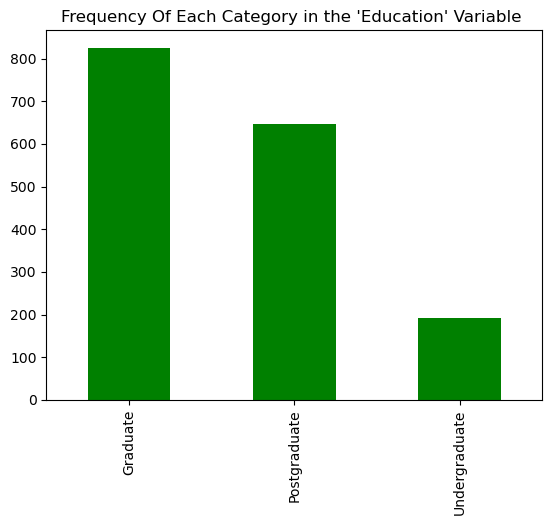

In [35]:
# VISUALIZING THE "Education"
df_train['Education'].value_counts().plot(kind='bar',color = 'green')
plt.title("Frequency Of Each Category in the 'Education' Variable ")
plt.show()

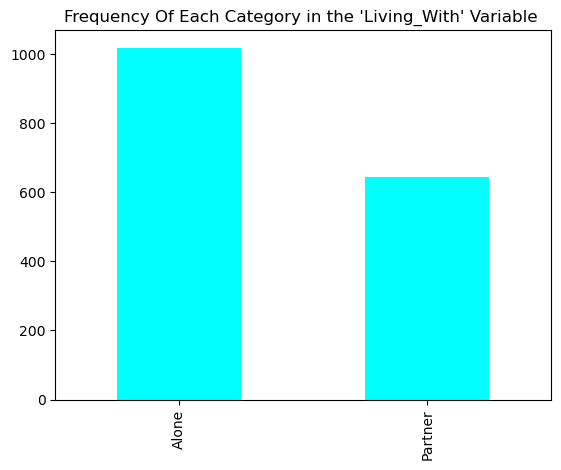

In [36]:
# VISUALIZING THE "Living_With"
df_train['Living_With'].value_counts().plot(kind='bar',color = 'cyan')
plt.title("Frequency Of Each Category in the 'Living_With' Variable ")
plt.show()

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


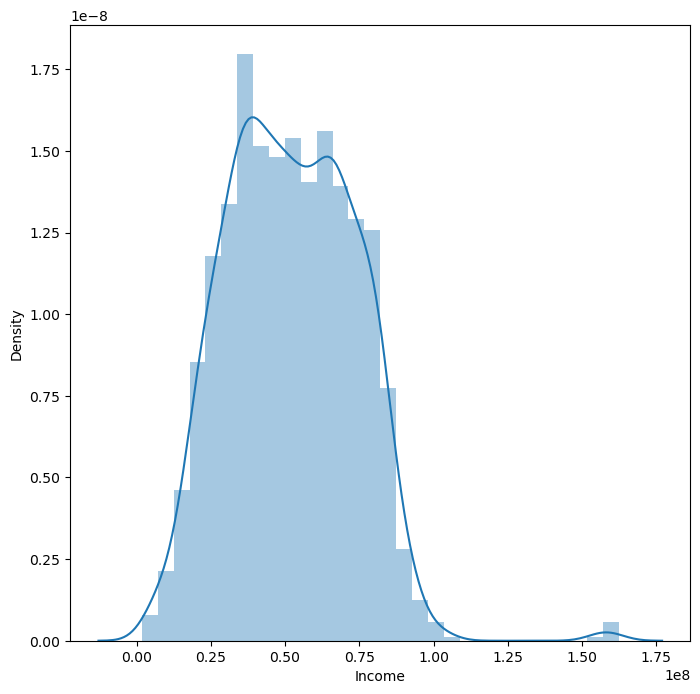

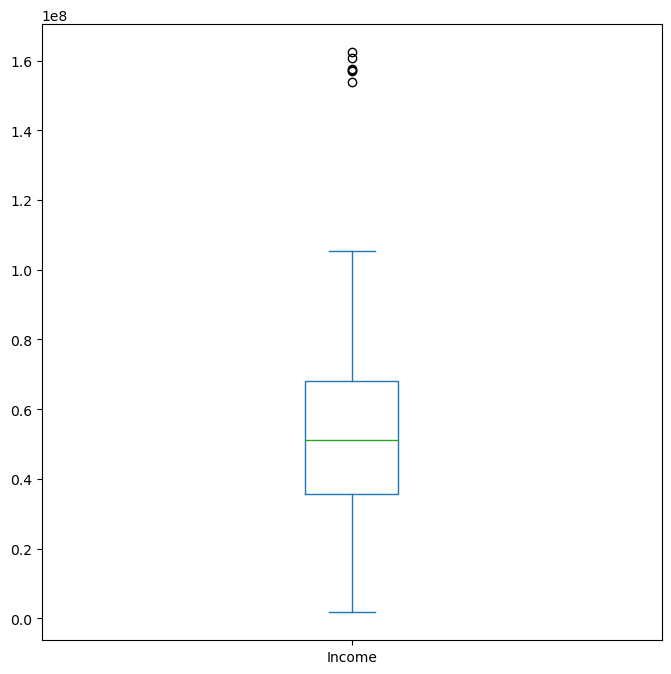

In [37]:
# VISUALIZING THE "Income"
plt.figure(figsize=(8,8))
sns.distplot(df_train["Income"])
plt.show()

df_train["Income"].plot.box(figsize=(8,8))
plt.show()

C:\ProgramData\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


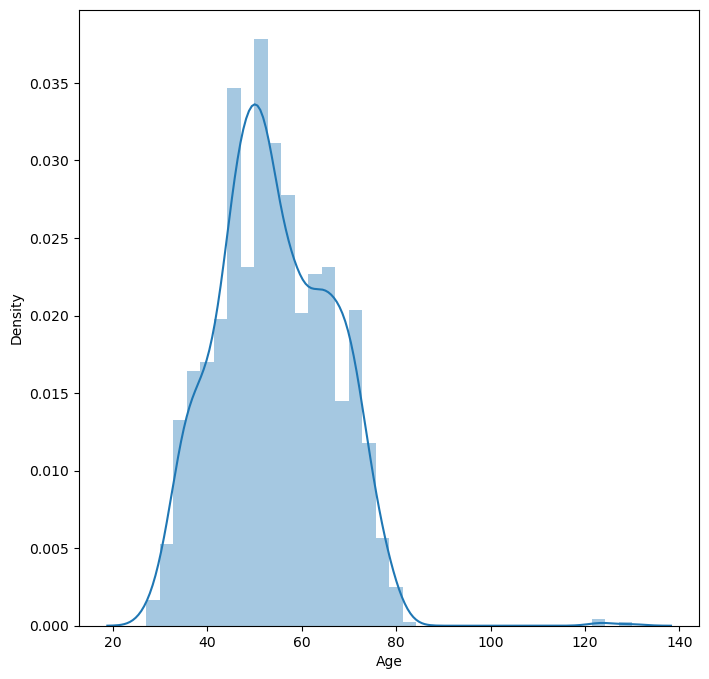

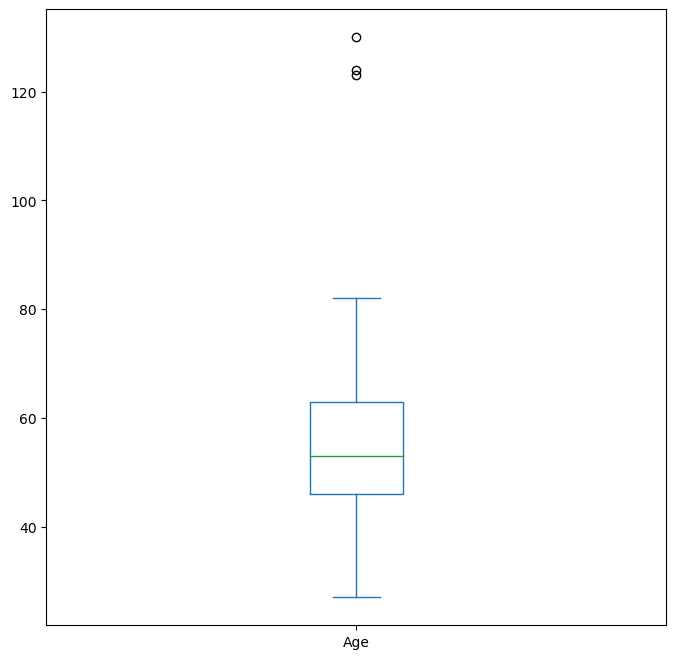

In [38]:
# VISUALIZING THE "Age"
plt.figure(figsize=(8,8))
sns.distplot(df_train["Age"])
plt.show()

df_train["Age"].plot.box(figsize=(8,8))
plt.show()

## Bivariate Analysis

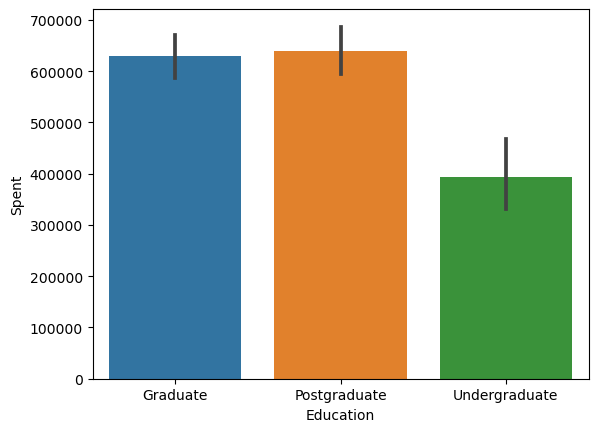

In [39]:
# How expenses impacts on Education( Education v/s Spent)
sns.barplot(x="Education", y="Spent", data=df_train)
plt.show()

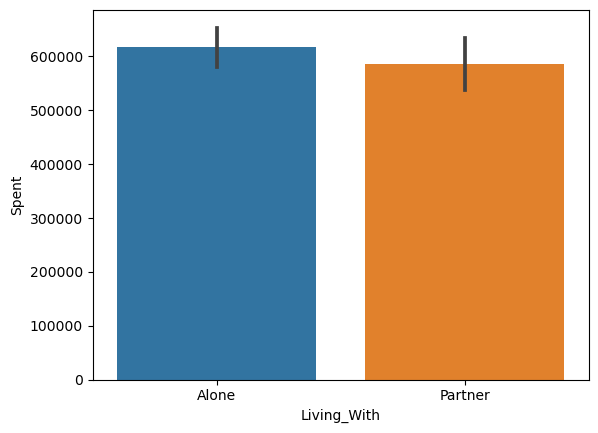

In [40]:
# How 'Living_With' status impacts on spenting( Living_With v/s Spent)
sns.barplot(x="Living_With", y="Spent", data=df_train)
plt.show()

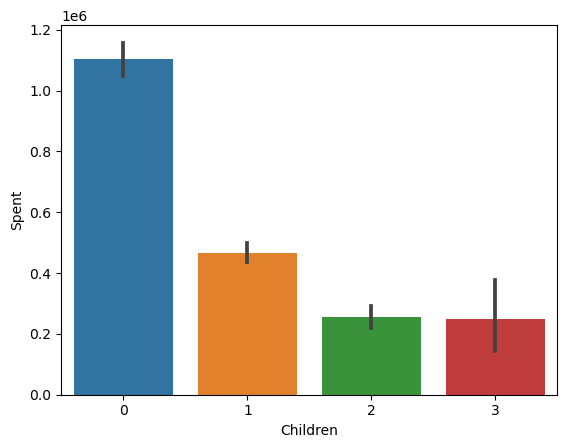

In [41]:
# How 'Children' count impacts on spenting( Children v/s Spent)
sns.barplot(x="Children", y="Spent", data=df_train)
plt.show()

## Multivariate Analysis

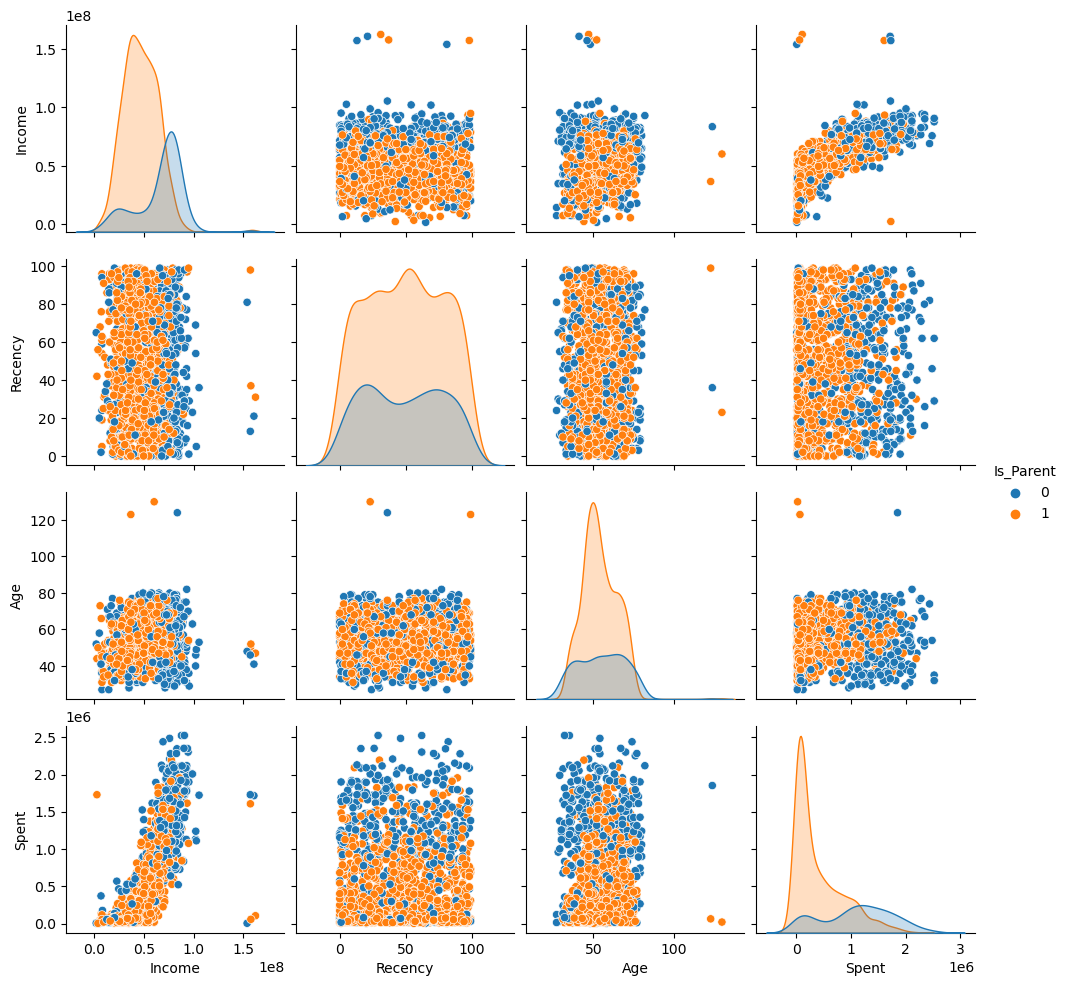

In [42]:
#To plot some selected features 

To_Plot = [ "Income", "Recency", "Age", "Spent", "Is_Parent"]
sns.pairplot(df_train[To_Plot], hue= "Is_Parent")
plt.show()

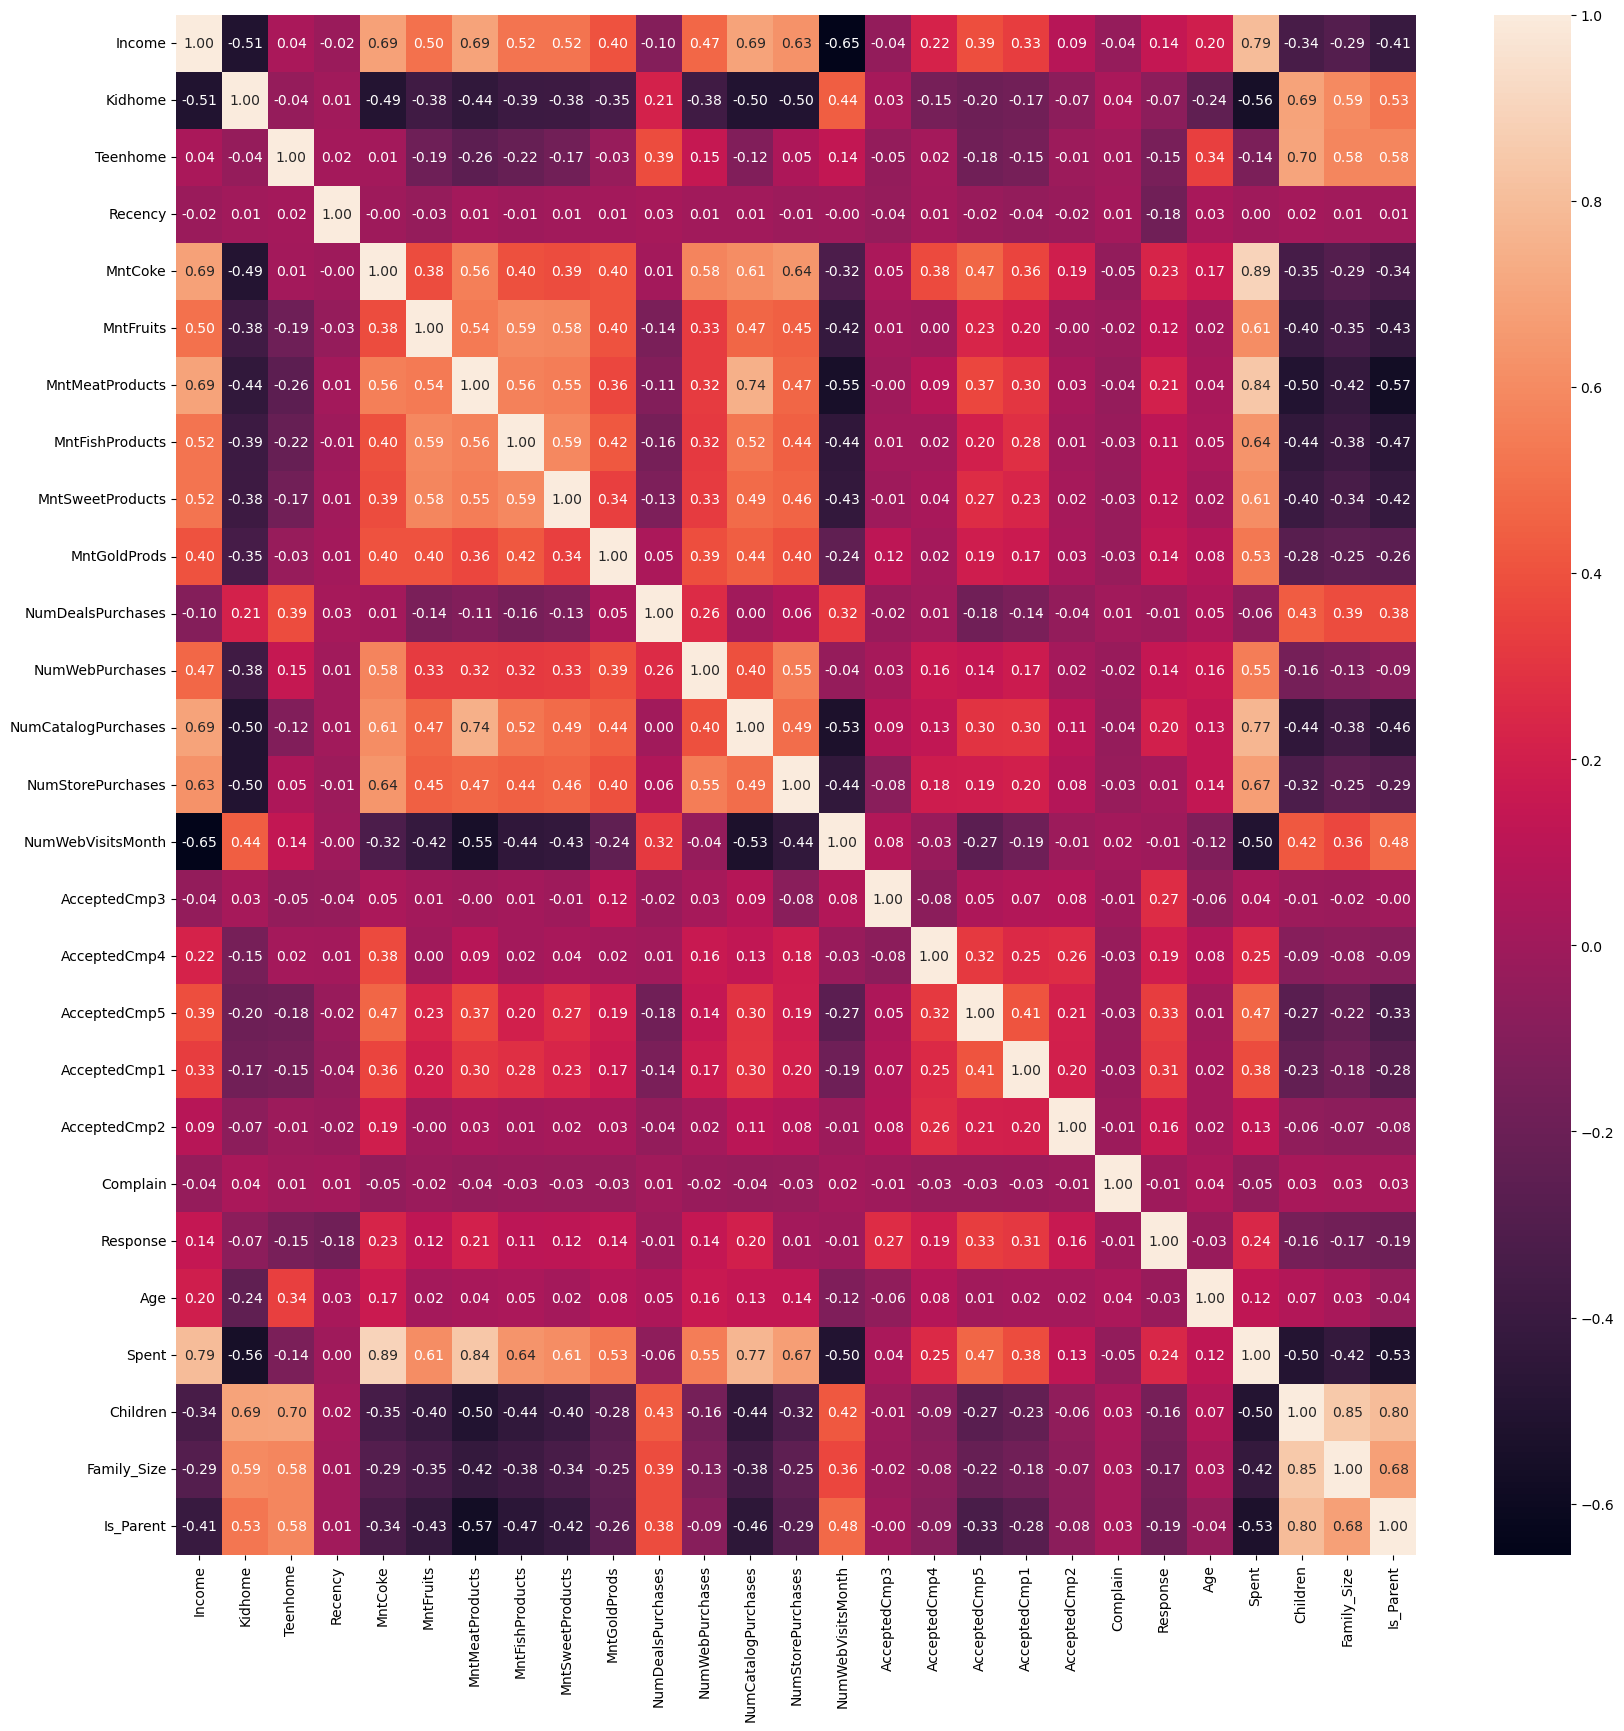

In [43]:
#correlation amongst the features (Excluding the categorical features)

#correlation matrix
corr=df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, fmt='.2f', annot=True);
plt.show()

In [44]:
# The data is quite clean and the new features have been included.so move on to data preprocessing

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

Preprocessing the data to perform clustering operations.

The following steps are applied to preprocess the data:

1. Label encoding the categorical features
2. Scaling the features using the standard scaler
3. Creating a subset dataframe for dimensionality reduction

In [45]:
#Get list of categorical variables
s = (df_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


## Encoding categorical data

In [46]:
#Label Encoding the object dtypes.
from sklearn.preprocessing import LabelEncoder
labenc=LabelEncoder()
for i in object_cols:
    df_train[i]=df_train[[i]].apply(labenc.fit_transform)
    
print("All features in training dataset are now numerical")

All features in training dataset are now numerical


In [47]:
#for testing dataset

#Label Encoding the object dtypes.

for i in object_cols:
    df_test[i]=df_test[[i]].apply(labenc.fit_transform)
    
print("All features in test dataset are now numerical")

All features in test dataset are now numerical


In [48]:
df_train.head()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1,66,1617000,0,0,1,0
1,0,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0,69,27000,0,2,3,1
2,0,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0,58,776000,0,0,1,0
3,0,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0,39,53000,0,1,2,1
4,1,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0,42,422000,1,1,3,1


## Scaling The Features

In [49]:
#Creating a copy of data

ds_train = df_train.copy()

# creating a subset of dataframe by deleting the features on deals accepted, compliants and promotions

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds_train = ds_train.drop(cols_del, axis=1)

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds_train)
scaled_ds_train = pd.DataFrame(scaler.transform(ds_train),columns= ds_train.columns )
print("All features are in training dataset are now scaled")

All features are in training dataset are now scaled


In [50]:
#Creating a copy of data

ds_test = df_test.copy()

# creating a subset of dataframe by deleting the features on deals accepted, compliants and promotions

cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds_test = ds_test.drop(cols_del, axis=1)

#Scaling
scaler.fit(ds_test)
scaled_ds_test = pd.DataFrame(scaler.transform(ds_test),columns= ds_test.columns )
print("All features are in testing dataset are now scaled")

All features are in testing dataset are now scaled


In [51]:
#Scaled data to be used for Dimensionality reduction
scaled_ds_train.head()

,Education,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.90666,0.285139,-0.824613,-0.908634,0.309238,0.969963,1.567623,1.688165,2.482674,1.478884,0.877769,0.338224,1.514416,2.456014,-0.554217,0.680756,0.984657,1.678070,-0.794979,-1.248393,-1.448995,-1.565314
1,-0.90666,-0.264031,1.011172,0.911918,-0.382672,-0.869986,-0.631338,-0.713680,-0.646207,-0.629637,-0.733585,-0.173109,-1.161558,-0.564708,-1.170714,-0.135464,1.233956,-0.960772,-0.794979,1.384552,0.720909,0.638850
2,-0.90666,0.912583,-0.824613,-0.908634,-0.797819,0.353698,0.581882,-0.175489,1.359958,-0.144920,-0.026161,-0.684442,1.514416,-0.229072,1.295274,-0.543574,0.319857,0.282305,-0.794979,-1.248393,-1.448995,-1.565314
3,-0.90666,-1.181241,1.011172,-0.908634,-0.797819,-0.869986,-0.555512,-0.651410,-0.498965,-0.581165,-0.753236,-0.173109,-0.779276,-0.900343,-0.554217,0.272646,-1.259041,-0.917621,-0.794979,0.068080,-0.364043,0.638850
4,0.55720,0.292357,1.011172,-0.908634,1.554676,-0.392307,0.430229,-0.215519,0.163621,0.000496,-0.556729,1.360890,0.367570,0.106564,0.062280,-0.135464,-1.009742,-0.305211,1.257894,0.068080,0.720909,0.638850


# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>

Dimensionality reduction is the process of reducing the number of unwanted features  under consideration, by obtaining a set of principal variables.

### Principal component analysis (PCA) 
Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.
it will give the principal components, That is the top N features.
the top N features is responsible for explaining the dataset.

For this project, we are going to reduce the dimensions to 3 (that is 22 features is converted into 3 components/features).

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_ds_train)
pca_ds = pd.DataFrame(pca.transform(scaled_ds_train), columns=(["pc1","pc2"]))
pca_ds

,pc1,pc2
0,4.880003,-0.241578
1,-2.882392,0.285575
2,2.884488,-1.121648
3,-2.374473,-1.809079
4,-0.702606,0.510026
...,...,...
1658,-0.612415,-3.887155
1659,-2.058965,-0.076410
1660,-2.880582,-2.243251
1661,-1.455355,0.082752


In [53]:
# for testing dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_ds_test)
pca_ds_test = pd.DataFrame(pca.transform(scaled_ds_test), columns=(["pc1","pc2"]))
pca_ds_test

,pc1,pc2
0,-2.120269,-0.634114
1,-3.328437,0.804078
2,-2.819568,1.190944
3,-0.049322,-2.339695
4,-2.741199,0.277549
...,...,...
534,3.341829,-0.892941
535,-2.892017,1.393545
536,2.477317,-1.000522
537,2.714199,-2.342861


# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>

We have reduced the features to 2 dimensions, now we will be performing clustering via Agglomerative clustering. 

## Agglomerative clustering
Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.Before that we need to find out the number of clusters (k) using Elbow method.

## Steps:
1. Findout the no:of clusters(k) using elbow method.
2. clustering using the k.

In [54]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [55]:
# using WCSS (Within Clusters Sum of Squares)
# Elbow method

#for this, finding the wcss value for different no: of clusters and then choose the optimum one(elbow)
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_ds)
    
    wcss.append(kmeans.inertia_)

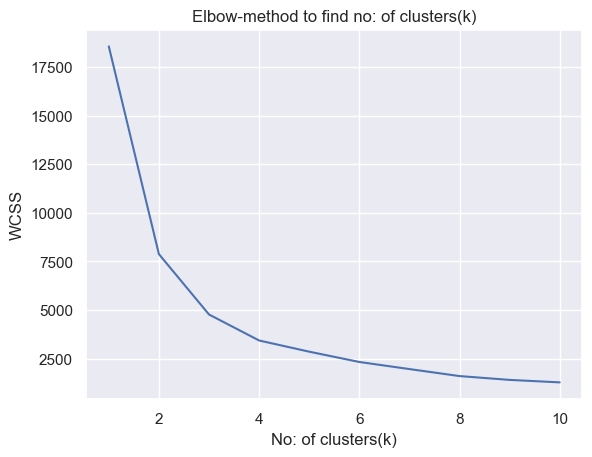

In [56]:
# elbow method-plot
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow-method to find no: of clusters(k)')
plt.xlabel('No: of clusters(k)')
plt.ylabel('WCSS')
plt.show()

### Observations from graph:
1. The k value = 4
2. After the k=4 , there is no significant drop.
3. Also the k with minimum wcss 

## Training the model

In [57]:
# k=4

kmeans=KMeans(n_clusters=4, init='k-means++', random_state=0)

## Return a label for each data point based on their cluster


In [58]:
y=kmeans.fit_predict(pca_ds)
print(y)

[1 0 1 ... 3 0 3]


## Visualizing the Clusters


In [59]:
x=pca_ds.values

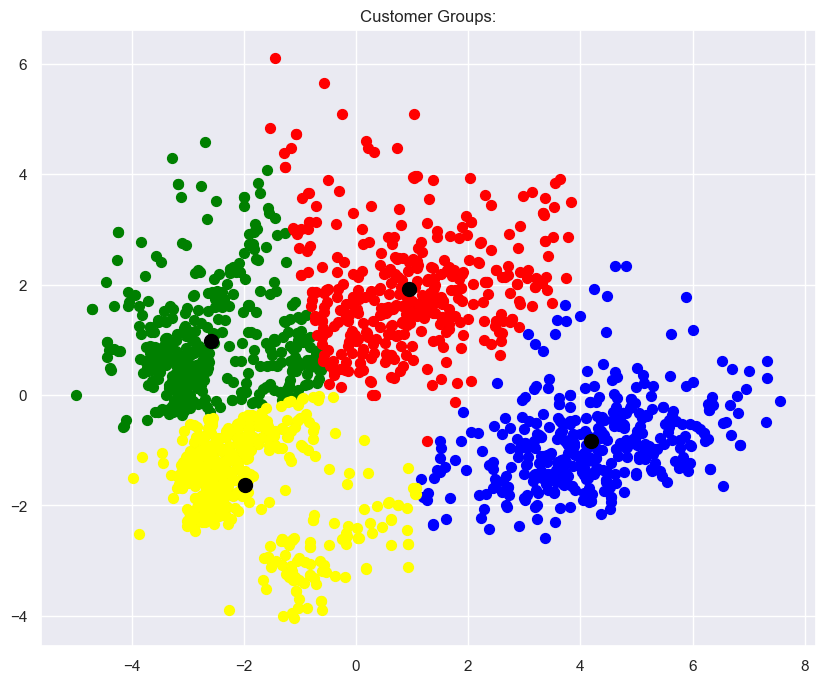

In [60]:
# plotting all the clustersand their centroids

plt.figure(figsize=(10,8))

plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster-01')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='blue', label='Cluster-02')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='red', label='Cluster-03')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='yellow', label='Cluster-04')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color='black', label='Centroid')

plt.title('Customer Groups:')
plt.show()

## Agglomerative Clustering


In [61]:
#Initiating the Agglomerative Clustering model 
aggclust = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
y_pred = aggclust.fit_predict(pca_ds)
pca_ds["Clusters"] = y_pred
#Adding the Clusters feature to the orignal dataframe.
df_train["Clusters"]= y_pred

In [62]:
df_train['Clusters'].value_counts()

0    539
1    515
3    357
2    252
Name: Clusters, dtype: int64

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">MODEL EVALUATION</p>

As this involves unsupervised clustering, we lack labeled features for assessing or rating our model's performance. The aim of this section is to examine the structures within the clusters and ascertain their inherent characteristics.

So to accomplish this, we will explore the data within the context of these clusters through exploratory data analysis, ultimately deriving meaningful insights and conclusions.

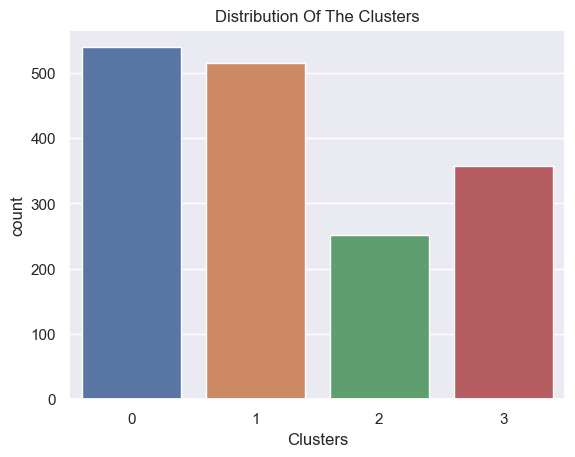

In [63]:
# distribution of clusters

pl = sns.countplot(x=df_train["Clusters"])
plt.title("Distribution Of The Clusters")
plt.show()

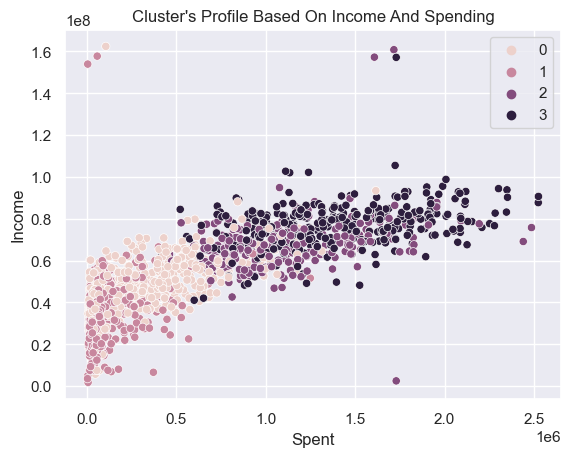

In [64]:
# Cluster's Profile Based On Income And Spending
sns.scatterplot(data = df_train,x=df_train["Spent"], y=df_train["Income"],hue=df_train["Clusters"])
plt.title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

1. Cluster 0: average spending & average income
2. Cluster 1: low spending & low income
3. Cluster 2: high spending & average income
4. Cluster 3: high spending & high income

# Evaluation with Test dataset



In [65]:
y_pred_test = aggclust.fit_predict(pca_ds_test)
pca_ds_test["Clusters"] = y_pred_test
#Adding the Clusters feature to the orignal dataframe.
df_test["Clusters"]= y_pred_test

In [66]:
y_test=kmeans.fit_predict(pca_ds_test)

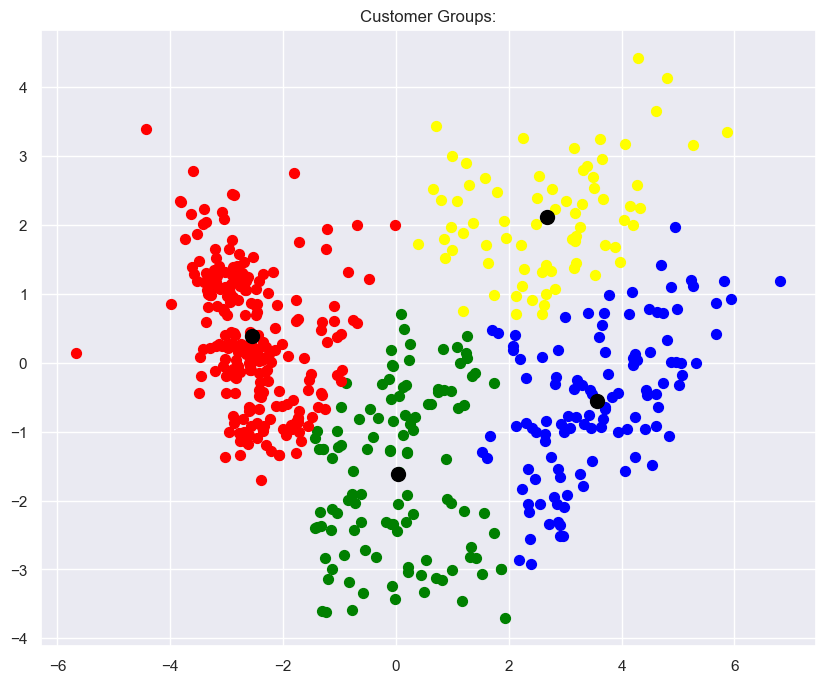

In [67]:
# plotting all the clusters and their centroids in Testing dataset
x_test=pca_ds_test.values
plt.figure(figsize=(10,8))

plt.scatter(x_test[y_test==0,0], x_test[y_test==0,1], s=50, c='green', label='Cluster-01')
plt.scatter(x_test[y_test==1,0], x_test[y_test==1,1], s=50, c='blue', label='Cluster-02')
plt.scatter(x_test[y_test==2,0], x_test[y_test==2,1], s=50, c='red', label='Cluster-03')
plt.scatter(x_test[y_test==3,0], x_test[y_test==3,1], s=50, c='yellow', label='Cluster-04')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color='black', label='Centroid')

plt.title('Customer Groups:')
plt.show()

In [68]:
df_test['Clusters'].value_counts()

1    250
0    127
2     91
3     71
Name: Clusters, dtype: int64

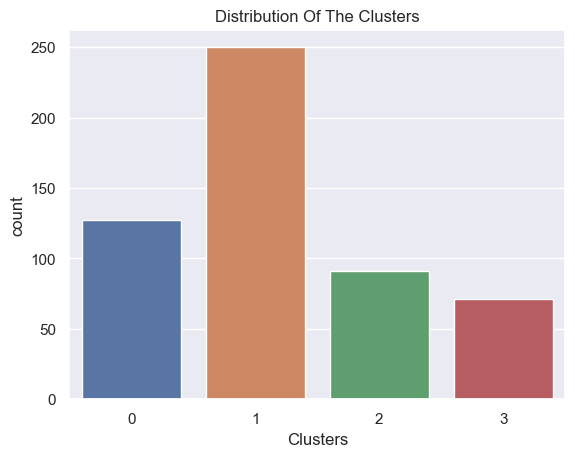

In [69]:
# distribution of clusters of test dataset

pl = sns.countplot(x=df_test["Clusters"])
plt.title("Distribution Of The Clusters")
plt.show()

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">CLUSTER ANALYSIS</p>

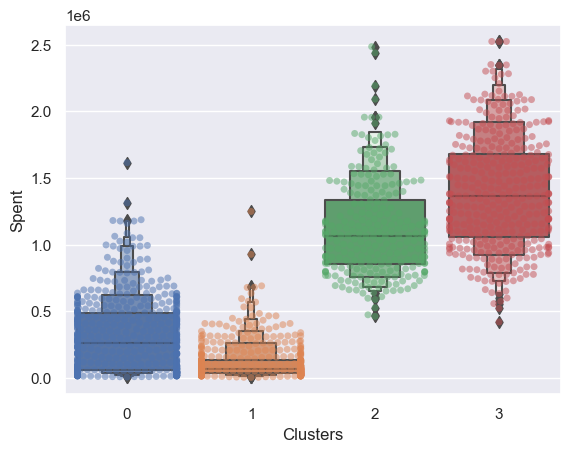

In [70]:
# detailed distribution of clusters as per the various products in the data. 
import warnings
warnings.filterwarnings("ignore")
plt.figure()
sns.swarmplot(x=df_train["Clusters"], y=df_train["Spent"], alpha=0.5)
sns.boxenplot(x=df_train["Clusters"], y=df_train["Spent"])
plt.show()

### observations from the plot:
1. More spending is by cluster 3 followed by cluser 2.
2. Low spending by cluster 1

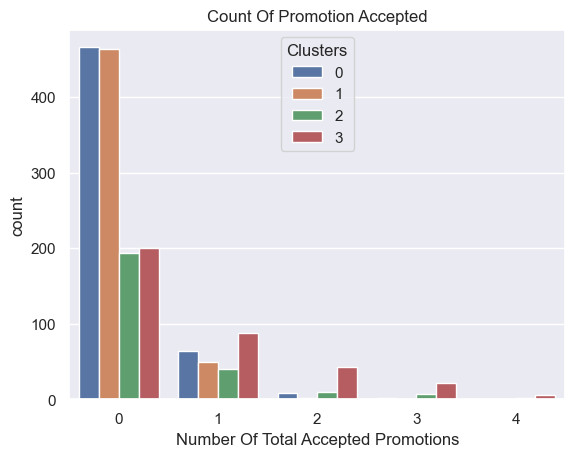

In [71]:
# How did our previous campaign perform?

#Creating a feature to get a sum of accepted promotions 
df_train["Total_Promos"] = df_train["AcceptedCmp1"]+ df_train["AcceptedCmp2"]+ df_train["AcceptedCmp3"]+ df_train["AcceptedCmp4"]+ df_train["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
sns.countplot(x=df_train["Total_Promos"],hue=df_train["Clusters"])
plt.title("Count Of Promotion Accepted")
plt.xlabel("Number Of Total Accepted Promotions")
plt.show()

### observations from the plot:
1. The campaigns have yet to generate a significant response, with a limited number of participants overall.
2. No one has engaged in all five campaigns, and there has been a decline in participation across the campaigns.
3. So we may need to create better and carefully thought-out marketing campaigns to increase sales.

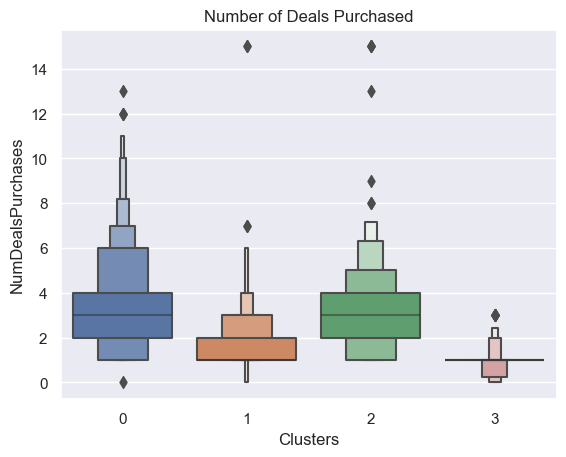

In [72]:
#Plotting the number of deals purchased


plt.figure()
sns.boxenplot(x=df_train["Clusters"],y=df_train["NumDealsPurchases"])
plt.title("Number of Deals Purchased")
plt.show()

### observations from the plot:
1. Unlike advertising campaigns, the special offers worked really well. 
2. They had the best results with cluster 0 and cluster 2 of customers. But our most important customers in cluster 3(high spent) didn't show much interest in the deals.

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">PROFILING</p>

Now that the clusters have been formed and their purchasing habits have been analyzed, it's time to identify the individuals within these clusters. This involves profiling the clusters to determine who the star customers are and who may require more attention from the retail store's marketing team.

To make these determinations, relevant customer attributes will be examined within the context of their respective clusters. Conclusions will be drawn based on the findings.

<Figure size 640x480 with 0 Axes>

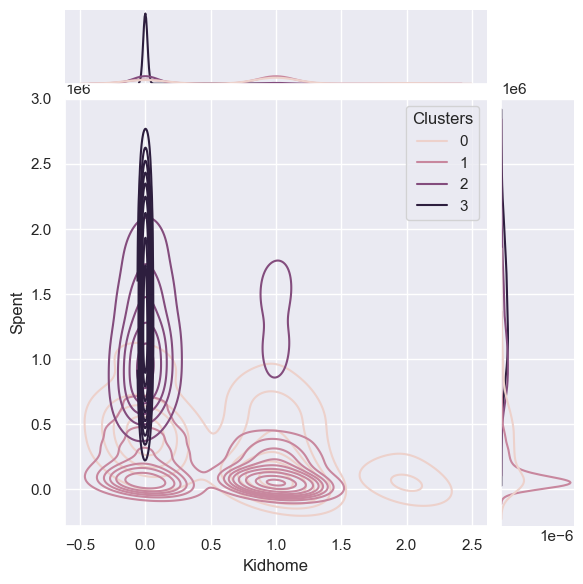

<Figure size 640x480 with 0 Axes>

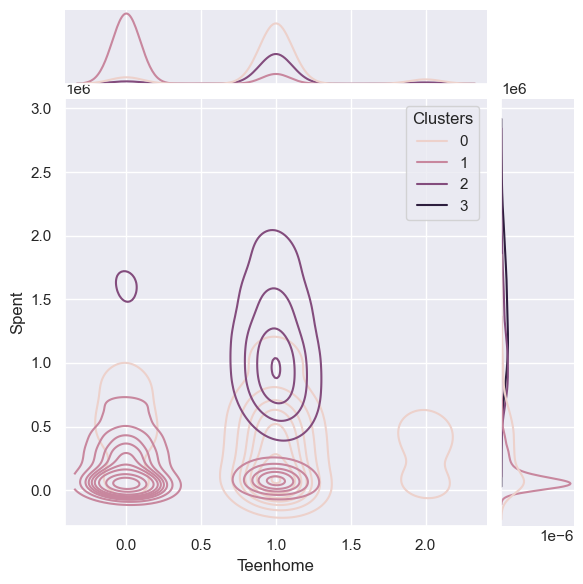

<Figure size 640x480 with 0 Axes>

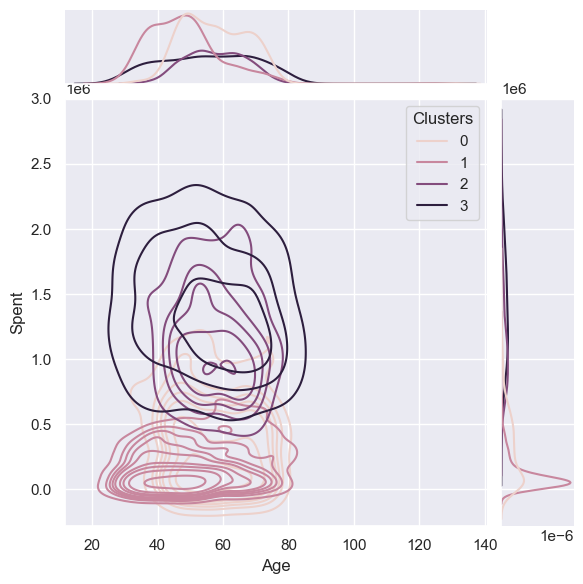

<Figure size 640x480 with 0 Axes>

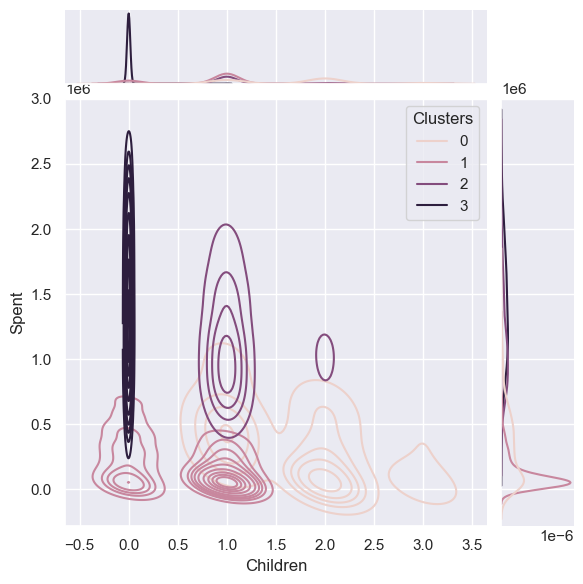

<Figure size 640x480 with 0 Axes>

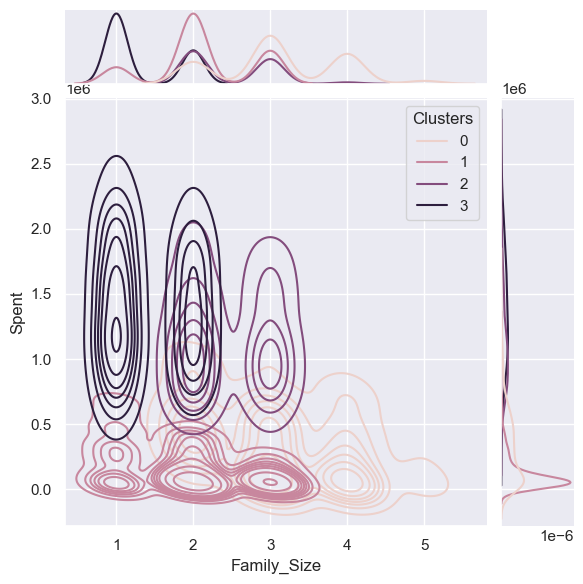

<Figure size 640x480 with 0 Axes>

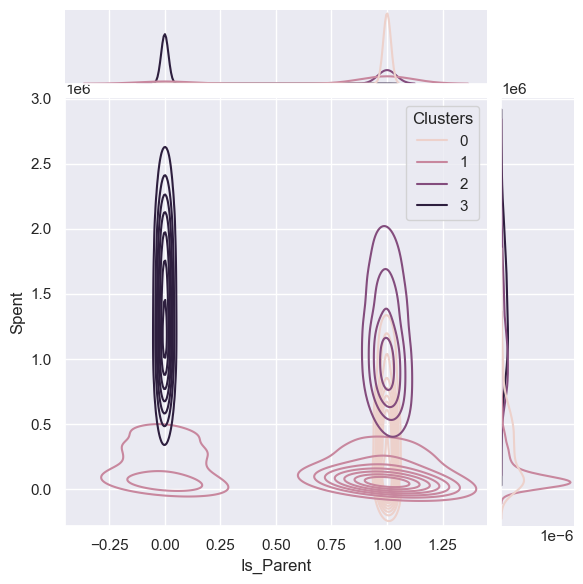

<Figure size 640x480 with 0 Axes>

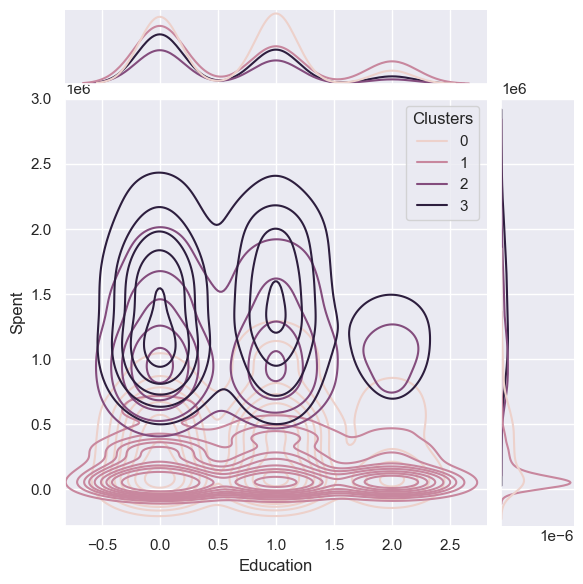

<Figure size 640x480 with 0 Axes>

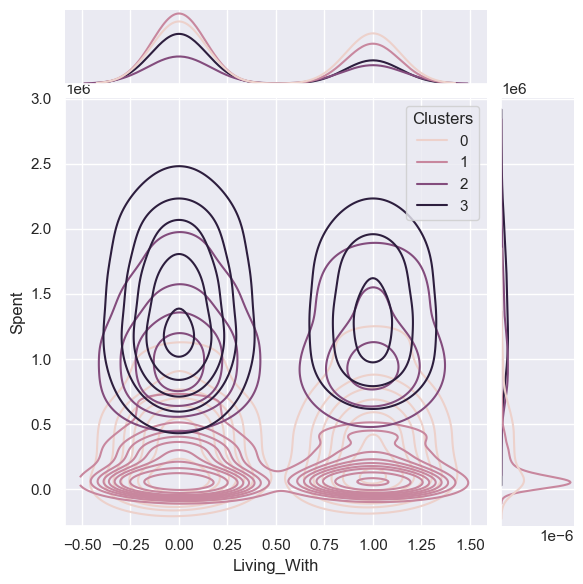

In [73]:
Personal = [ "Kidhome","Teenhome","Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=df_train[i], y=df_train["Spent"], hue =df_train["Clusters"], kind="kde")
    plt.show()


## Observations from the plot: Customer Profiling 
1. **Cluster-0:**

    * Customers are relatively older peoples, ranges from middle aged to older(35-75).
    
    * Family contains atleast two peoples and including childrens maximum of 5 peoples.
    
    * All of them are parents.
    
    * Atleast one children.
    

2. **Cluster-1:**

    * Customers are relatively older peoples, ranges from middle aged to older(30-80).
    
    * Spans all age groups.
    
    * Family contains atleast one person and including childrens maximum of 3 peoples.
    
    * Majority are parents.
    
    * maximum one children.
    
    * Less spent group of peoples.
    
    
3. **Cluster-2:**
    
    * Customers are relatively younger peoples, ranges from 20 to maximim 50 age.
    
    * Family contains atleat 2 and maximim 3 members.
    
    * Majority are parents.
    
    * Contains minimum 1 children and maximum 2 childrens.
    
    * Good spending culture.
    
    
4. **Cluster-3:**
    
    * Customers are relatively older peoples, ranges from 35 to maximim 80 age.
    
    * Most of them are living alone or single.
    
    * Family contains maxmimum 2 members.
    
    * Majority of them are not parents.
    
    * Good spending culture.

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

In conclusion, through the process of unsupervised clustering, which involved dimensionality reduction and agglomerative clustering techniques, I was able to create four distinct customer clusters. These clusters served as a foundation for profiling customers based on their family structures and income/spending behaviors. The insights derived from this analysis can greatly enhance our ability to formulate more targeted and effective marketing strategies for our diverse customer segments, ultimately driving the success of our business

# <p style="background-color:#182F2F;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;">END</p>

# <p style="font-family:newtimeroman;font-size:150%;text-align:center;border-radius:10px 10px;">Thank You</p>